In [2]:
from my_methods import *
import random as rd

In [2]:
dfE = pd.read_table('data/SGA_ExE.txt')
dfN = pd.read_table('data/SGA_NxN.txt')
#dfEN = pd.read_table('data/SGA_ExN_NxE.txt')

In [2]:
df_global = pd.read_csv('data/df_global.csv')

In [160]:
ExE_mul, ExE_add = splitted_dict(dfE)
json_save(ExE_mul, 'ExE_mul_splitted.json')
json_save(ExE_add, 'ExE_add_splitted.json')

In [161]:
NxN_mul, NxN_add = splitted_dict(dfN)
json_save(NxN_mul, 'NxN_mul_splitted.json')
json_save(NxN_add, 'NxN_add_splitted.json')

In [162]:
global_mul, global_add = splitted_dict(df_global)
json_save(global_mul, 'global_mul_splitted.json')
json_save(global_add, 'global_add_splitted.json')

In [3]:
########## Borra esto
ExE_mul = json_load('ExE_mul_splitted.json')
ExE_add = json_load('ExE_add_splitted.json')

NxN_mul = json_load('NxN_mul_splitted.json')
NxN_add = json_load('NxN_add_splitted.json')

global_mul = json_load('global_mul_splitted.json')
global_add = json_load('global_add_splitted.json')

In [ ]:
##########

In [4]:
SMC5 = ['NSE4', 'NSE3', 'MMS21', 'KRE29', 'NSE1', 'SMC6', 'NSE5', 'SMC5']
condensin = ['BRN1', 'SMC2', 'SMC4', 'YCG1', 'YCS4']
NDC80 = ['TID3', 'NUF2', 'SPC24', 'SPC25']
BLOC1 = ['BLI1', 'BLS1', 'CNL1', 'KXD1', 'SNN1', 'VAB2']
ERMES = ['GEM1', 'MDM10', 'MDM12', 'MDM34', 'MMM1']
PAS = ['ATG18', 'FAB1', 'FIG4', 'VAC7', 'VAC14']
Synaptonemal = ['ECM11', 'GMC2', 'HOP1', 'RED1', 'ZIP1']
CPX1178 = ['DYN1', 'DYN2', 'DYN3', 'PAC11']
Exomer = ['BCH1', 'BCH2', 'BUD7', 'CHS5', 'CHS6']
TIM23 = ['MGE1', 'PAM16', 'PAM17', 'PAM18', 'SSC1', 'TIM17', 'TIM21', 'TIM23', 'TIM44', 'TIM50']
TORC2 = ['AVO1', 'AVO2', 'BIT61', 'LST8', 'TOR2', 'TSC11']
SPOTS = ['LCB1', 'LCB2', 'ORM1', 'ORM2', 'SAC1', 'TSC3']
COMPASS = ['BRE2', 'SDC1', 'SET1', 'SHG1', 'SPP1', 'SWD1', 'SWD2', 'SWD3']
SWISNF = ['ARP7', 'ARP9', 'RTT102', 'SNF2', 'SNF5', 'SNF6', 'SNF11', 'SNF12', 'SWI1', 'SWI3', 'SWP82', 'TAF14']
Translocon = ['SBH1', 'SEC61', 'SEC62', 'SEC63', 'SEC66', 'SEC72', 'SSS1']
septin = ['CDC3', 'CDC10', 'CDC11', 'CDC12', 'SHS1']
SEA = ['IML1', 'MTC5', 'NPR2', 'NPR3', 'RTC1', 'SEA4', 'SEC13', 'SEH1']

In [5]:
# Essential complexes

In [124]:
es = [SMC5, condensin, NDC80]
es_names = ['SMC5', 'condensin', 'NDC80']

In [7]:
# Nonssential complexes

In [122]:
ne = [BLOC1, ERMES, PAS, Synaptonemal, CPX1178, Exomer]
ne_names = ['BLOC1', 'ERMES', 'PAS', 'Synaptonemal', 'CPX1178', 'Exomer']

In [ ]:
# Mixed complexes

In [121]:
mixed = [TIM23, TORC2, SPOTS, COMPASS, SWISNF, Translocon, septin, SEA]
mixed_names = ['TIM23', 'TORC2', 'SPOTS', 'COMPASS', 'SWISNF', 'Translocon', 'septin', 'SEA']

In [119]:
# Conexion directa

In [155]:
def node_position(dic):
    num_nodes = len(dic.keys())
    pos = {}
    for n in dic.keys():
        pos[n] = tuple(np.random.choice(40, 2))
    return pos

def draw_complexes(list_complexes, dic_mul, dic_add, complex_names):
    fig, ax = plt.subplots(ncols=len(list_complexes), nrows=2, figsize=(5*len(list_complexes),10))
    com_mul = [represent_network(com, dic=dic_mul, dist=0) for com in list_complexes]
    com_add = [represent_network(com, dic=dic_add, dist=0) for com in list_complexes]
    complex_positions = [node_position(com) for com in com_mul]
    for i in range(len(ax)):
        for j in range(len(ax[i])):
            if i==0:
                nx.draw(nx.Graph(com_mul[j]), ax=ax[i][j], pos=complex_positions[j],
                with_labels=True, node_size=420, node_color='#3449eb', alpha=0.7, edge_color='#96a8d4', font_size=15)
                ax[i][j].set_title(complex_names[j]+'_mul', fontsize=15)
            ########################
            if i==1:
                nx.draw(nx.Graph(com_add[j]), ax=ax[i][j], pos=complex_positions[j],
                with_labels=True, node_size=420, node_color='#3449eb', alpha=0.7, edge_color='#96a8d4', font_size=15)
                ax[i][j].set_title(complex_names[j]+'_add', fontsize=15)
    fig.tight_layout(pad=8)

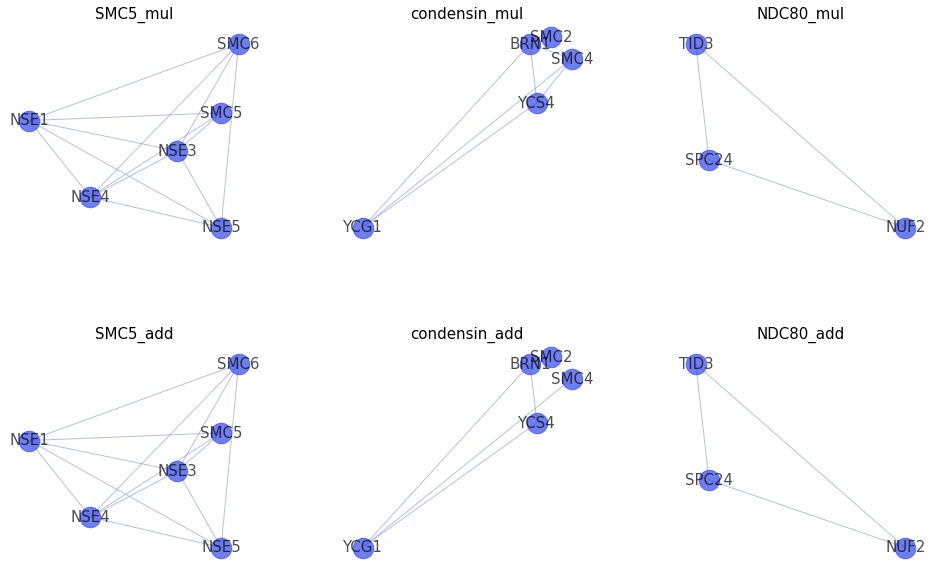

In [156]:
draw_complexes(es,dic_mul=ExE_mul, dic_add=ExE_add, complex_names=es_names)

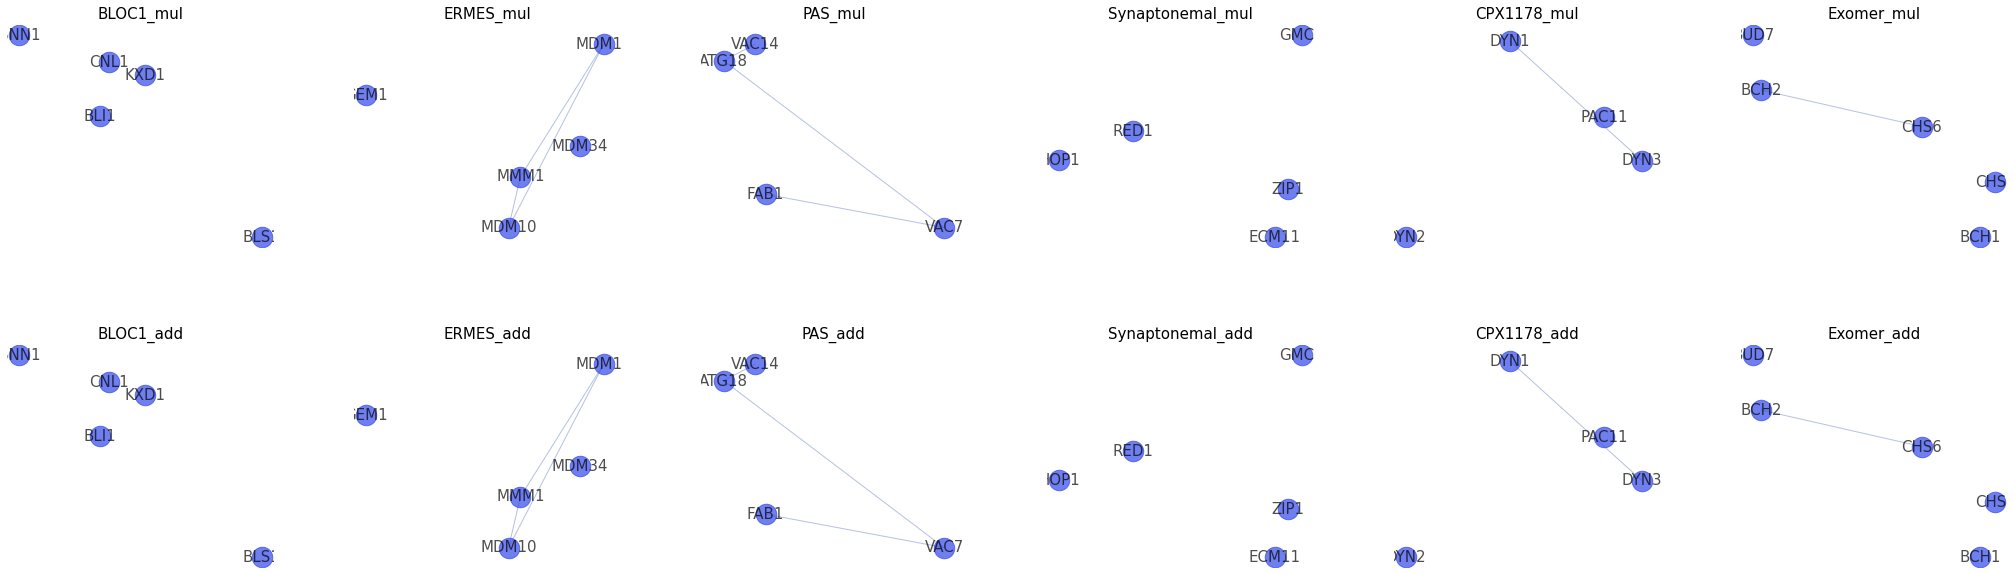

In [159]:
draw_complexes(ne,dic_mul=NxN_mul, dic_add=NxN_add, complex_names=ne_names)

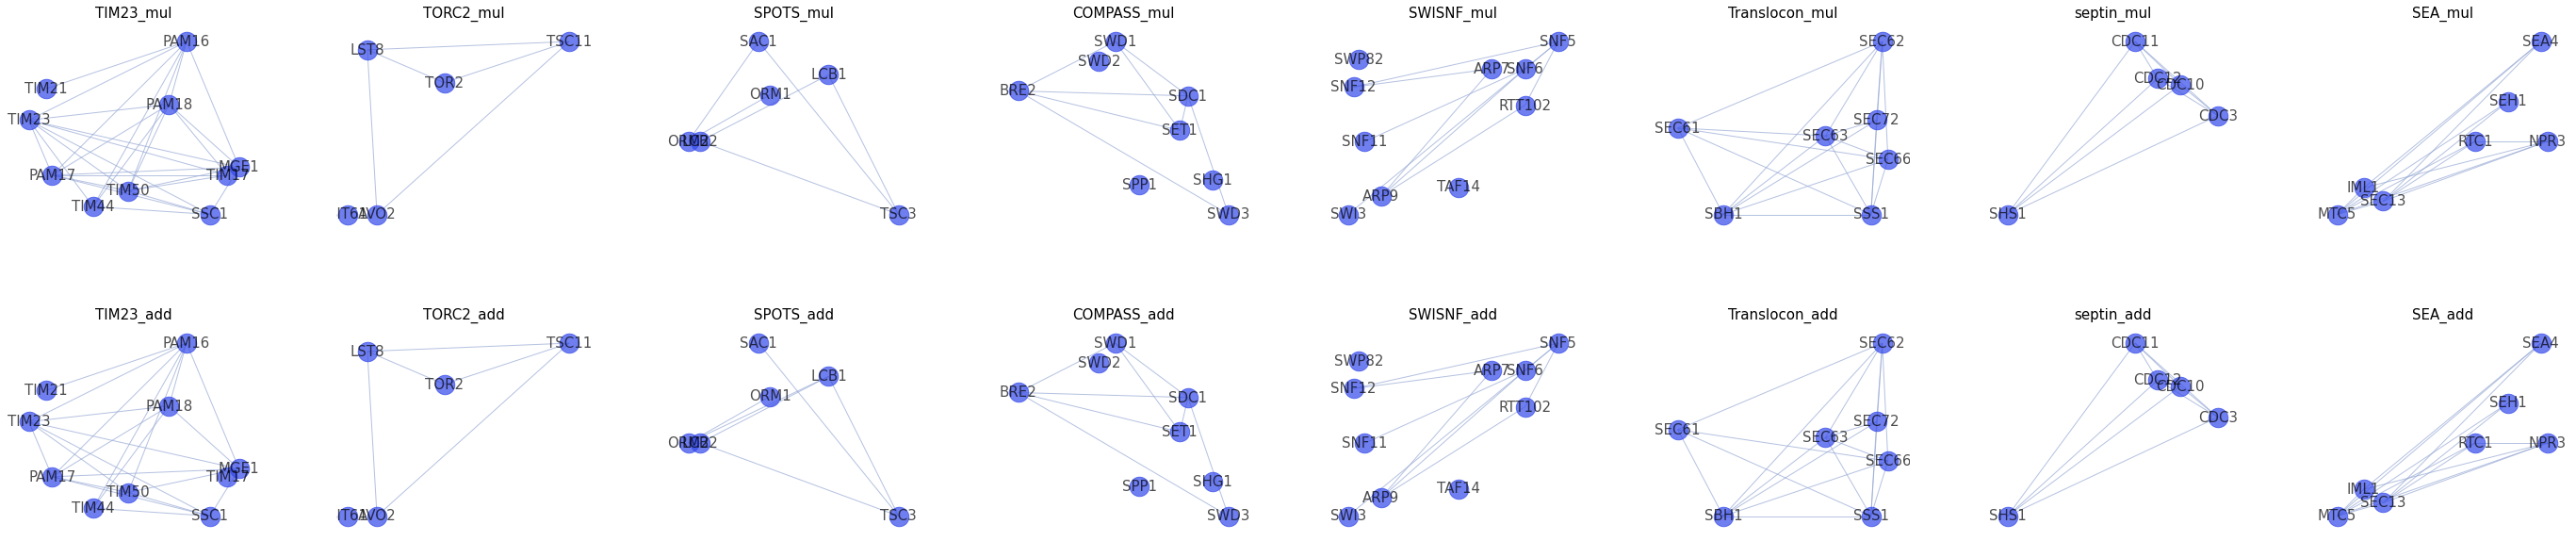

In [158]:
draw_complexes(mixed,dic_mul=global_mul, dic_add=global_add, complex_names=mixed_names)

In [ ]:
# # Nonessential complexes mul
# BLOC1_net = represent_network(BLOC1, dic=ExE_mul, dist=0)
# ERMES_net = represent_network(ERMES, dic=ExE_mul, dist=0)
# PAS_net = represent_network(PAS, dic=ExE_mul, dist=0)
# Synaptonemal_net = represent_network(Synaptonemal, dic=ExE_mul, dist=0)
# CPX1178_net = represent_network(CPX1178, dic=ExE_mul, dist=0)
# Exomer_net = represent_network(Exomer, dic=ExE_mul, dist=0)

# # Nonessential complexes add
# BLOC1_net = represent_network(BLOC1, dic=ExE_add, dist=0)
# ERMES_net = represent_network(ERMES, dic=ExE_add, dist=0)
# PAS_net = represent_network(PAS, dic=ExE_add, dist=0)
# Synaptonemal_net = represent_network(Synaptonemal, dic=ExE_add, dist=0)
# CPX1178_net = represent_network(CPX1178, dic=ExE_add, dist=0)
# Exomer_net = represent_network(Exomer, dic=ExE_add, dist=0)

In [ ]:
# Reconstruccion del complejo

In [9]:
def select_sample(gene_list, sample):
    selected = rd.sample(gene_list, int(len(gene_list)*sample))
    return selected

def get_genes(dic):
    return set(dic.keys())

def expand_half(comp, dic, sample, cv=5):
    percentage_obtained = []
    for _ in range(cv): 
        selected = select_sample(comp, sample)
        net = represent_network(selected, dic, dist=1)
        all_genes = get_genes(net)
        new_genes = all_genes.difference(set(selected))
        added_genes_com = new_genes.intersection(set(comp))
        part_of_complex = (len(added_genes_com)+len(selected))*100/len(comp)
        percentage_obtained.append(part_of_complex)
    return percentage_obtained

In [42]:
result_E = {'Complex':[], 'Predicted by mul':[],  'Predicted by add':[]}
sample = 1/2
for i, comp in enumerate(es):
    exp_mul = np.max(expand_half(comp, ExE_mul, sample=sample, cv=30))
    exp_add = np.max(expand_half(comp, ExE_add, sample=sample, cv=30))
    
    result_E['Complex'].append(es_names[i])
    result_E['Predicted by mul'].append(str(exp_mul)+'%')
    result_E['Predicted by add'].append(str(exp_add)+'%')

result_E = pd.DataFrame(result_E)
result_E

,Complex,Predicted by mul,Predicted by add
0,SMC5,100.0%,100.0%
1,condensin,80.0%,60.0%
2,NDC80,75.0%,75.0%


In [38]:
result_N = {'Complex':[], 'Predicted by mul':[],  'Predicted by add':[]}
sample = 1/2
for i, comp in enumerate(ne):
    exp_mul = np.max(expand_half(comp, NxN_mul, sample=sample, cv=30))
    exp_add = np.max(expand_half(comp, NxN_add, sample=sample, cv=30))
    
    result_N['Complex'].append(ne_names[i])
    result_N['Predicted by mul'].append(str(exp_mul)+'%')
    result_N['Predicted by add'].append(str(exp_add)+'%')

result_N = pd.DataFrame(result_N)
result_N
#50.0%	50.0%
#	ERMES	60.0%	60.0%
# 2	PAS	    60.0%	60.0%
# 3	Synapto	40.0%	40.0%
# 4	CPX1178	50.0%	50.0%
# 5	Exomer	40.0%	40.0#

,Complex,Predicted by mul,Predicted by add
0,BLOC1,50.0%,50.0%
1,ERMES,60.0%,60.0%
2,PAS,60.0%,60.0%
3,Synaptonemal,40.0%,40.0%
4,CPX1178,50.0%,50.0%
5,Exomer,40.0%,40.0%


In [43]:
result_G = {'Complex':[], 'Predicted by mul':[],  'Predicted by add':[]}
sample = 1/2
for i, comp in enumerate(mixed):
    exp_mul = np.max(expand_half(comp, global_mul, sample=sample, cv=30))
    exp_add = np.max(expand_half(comp, global_add, sample=sample, cv=30))
    
    result_G['Complex'].append(mixed_names[i])
    result_G['Predicted by mul'].append(str(round(exp_mul, 2))+'%')
    result_G['Predicted by add'].append(str(round(exp_add, 2))+'%')

result_G = pd.DataFrame(result_G)
result_G

,Complex,Predicted by mul,Predicted by add
0,TIM23,100.0%,100.0%
1,TORC2,83.33%,83.33%
2,SPOTS,83.33%,83.33%
3,COMPASS,87.5%,87.5%
4,SWISNF,75.0%,75.0%
5,Translocon,100.0%,100.0%
6,septin,100.0%,100.0%
7,SEA,100.0%,100.0%


In [ ]:
##################################################

In [12]:
es_names = ['SMC5', 'condensin', 'NDC80']
for i, comp in enumerate(es):
    test_mul0 = count_interactions(represent_network(comp, ExE_mul, dist=0)/2
    test_add0 = count_interactions(represent_network(comp, ExE_add, dist=0)/2
    
    print(f'En ExE, {es_names[i]}: dist1: mul:{test_mul1}, add:{test_add1}')

En ExE, SMC5: dist1: mul:63, add:83
En ExE, condensin: dist1: mul:49, add:69
En ExE, NDC80: dist1: mul:34, add:25


In [17]:
ne_names = ['BLOC1', 'ERMES', 'PAS', 'Synaptonemal', 'CPX1178', 'Exomer']
for i, comp in enumerate(ne):
    test_mul0 = count_interactions(represent_network(comp, NxN_mul, dist=0))/2
    test_add0 = count_interactions(represent_network(comp, NxN_add, dist=0))/2
    
    print(f'En NxN, {ne_names[i]}: dist1: mul:{test_mul0}, add:{test_add0}')

En NxN, BLOC1: dist1: mul:0.0, add:0.0
En NxN, ERMES: dist1: mul:3.0, add:3.0
En NxN, PAS: dist1: mul:3.0, add:3.0
En NxN, Synaptonemal: dist1: mul:0.0, add:0.0
En NxN, CPX1178: dist1: mul:1.0, add:1.0
En NxN, Exomer: dist1: mul:1.0, add:1.0


In [18]:
mixed_names = ['TIM23', 'TORC2', 'SPOTS', 'COMPASS', 'SWISNF', 'Translocon', 'septin', 'SEA']
for i, comp in enumerate(mixed):
    test_mul0 = count_interactions(represent_network(comp, global_mul, dist=0))/2
    test_add0 = count_interactions(represent_network(comp, global_add, dist=0))/2
    
    print(f'En G, {mixed_names[i]}: dist1: mul:{test_mul0}, add:{test_add0}')

NameError: name 'global_mul' is not defined

In [12]:
# Aqui el objetivo no es expandir el conjunto de genes del complejo, sino coger una parte y que se prediga el resto

# --------------------------------------------------------------------------------------------------